In [1]:
import pandas as pd 

notas = pd.read_csv("ratings.csv")
notas.head()  

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
notas.shape  #retornar o tamanho de um array (100836 avaliações, 4 colunas)

(100836, 4)

In [3]:
notas.columns = ['usuarioID', 'filmeID', 'nota', 'momento']  #redefinindo o nome das colunas
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas['nota'].unique()   #utilizamos o UNIQUE() para trazer somente os valores que consistem na tabelas sem repetições 

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [5]:
notas['nota'].value_counts()   #metodo VALUE_COUNTS() para contar quantas vezes existem o mesmo valor na tabela 

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [6]:
print('Média = ',notas['nota'].mean()) #retornando a média das notas
print('Mediana = ',notas['nota'].median()) #retornando a mediana das notas

#utilizando o print para visualizar as duas notas

Média =  3.501556983616962
Mediana =  3.5


In [7]:
notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

<Axes: ylabel='Frequency'>

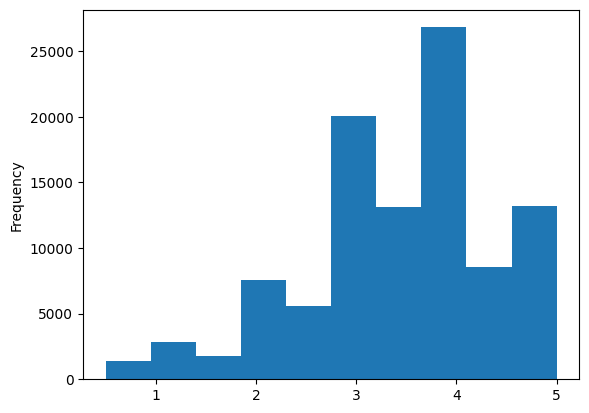

In [8]:
notas.nota.plot(kind= 'hist')

In [9]:
notas.nota.describe()  #utilizando o DESCRIBE() para trazer algumas descrições do dataFrame

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: >

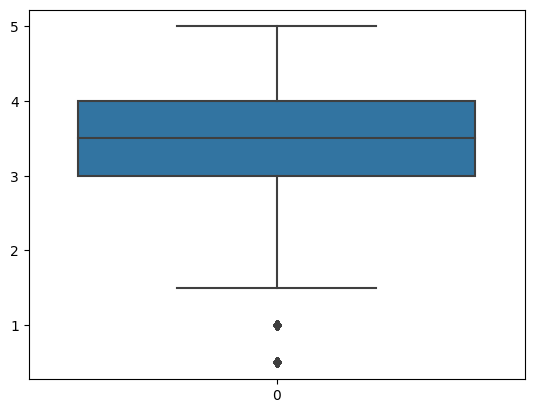

In [10]:
import seaborn as sns

sns.boxplot(notas.nota)

In [11]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ['filmeID', 'titulo', 'generos']   #renomeando a columa do dataFrame               
filmes.head()  

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#Tratando com a lista de filmes

In [13]:
notas.query("filmeID==1").nota.mean()

3.9209302325581397

In [14]:
medias_filmes = notas.groupby('filmeID').mean()['nota'] #utlizando o GROUPY para tirar as media
medias_filmes.head()

filmeID
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

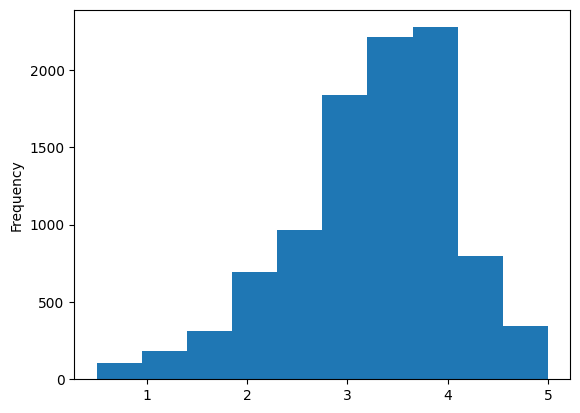

In [15]:
medias_filmes.plot(kind='hist') #utilizando o método "plot" com a abreviação 'hist' para efetuar o histograma

In [16]:
medias_filmes.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<Axes: ylabel='nota'>

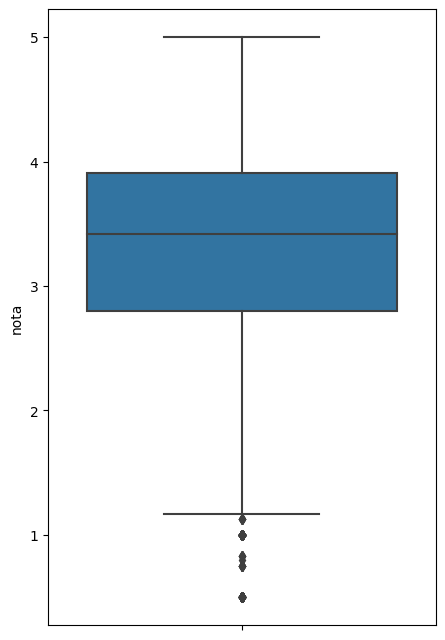

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))    
sns.boxplot(y=medias_filmes)  

C:\Users\fernanda_amaral\AppData\Local\Temp\ipykernel_18320\2342508319.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_filmes)


<Axes: xlabel='nota', ylabel='Density'>

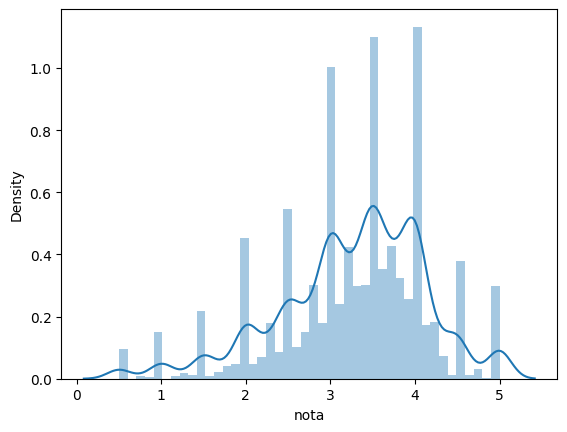

In [18]:

sns.distplot(medias_filmes)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

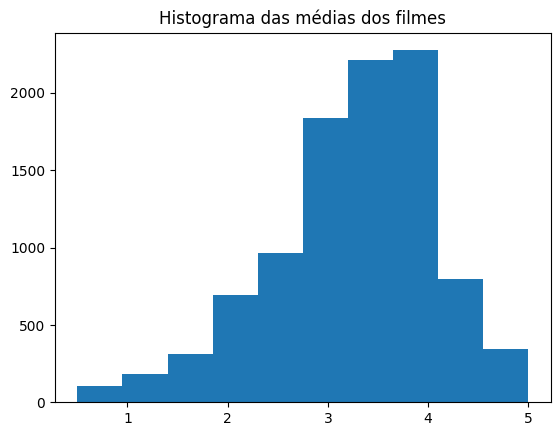

In [19]:
import matplotlib.pyplot as plt

plt.hist(medias_filmes)
plt.title("Histograma das médias dos filmes")

In [20]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [21]:
tmdb.original_language.unique() # categorica nominal        

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [22]:
# primeiro grau
# primeiro grau                             # categorica ordinal
# primeiro grau 
# 1 grau < 2 grau < 3 grau 

In [23]:
# budget => orcamento => quantitativa continuo 

In [24]:
# quantidade de votos => 1, 2, 3, 4, não número float. 
# notas do movielens => 0.5, 1, 1.5, ...,5 não tem 2.7 

In [25]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [26]:
tmdb["original_language"].value_counts()

original_language
en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [27]:
tmdb["original_language"].value_counts().to_frame() #utilizando o TO_FRAME para criar um dataFrame a partir do índice

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [28]:
c_l = tmdb["original_language"].value_counts().to_frame().reset_index()  #utilizando o RESET_INDEX() qunado queremos que esses valores acompanhem duas colunas de dados separadas do índice 
c_l.columns = ['original_language', 'total']  #renomeando as colunas 
c_l.head()   #imprimindo os 5 primeiros itens

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

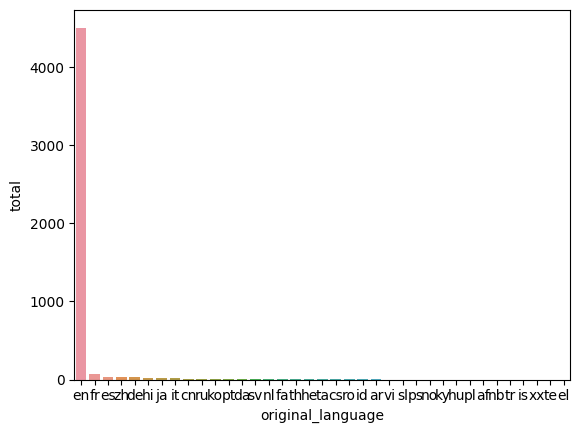

In [29]:
sns.barplot(x='original_language', y='total', data = c_l)

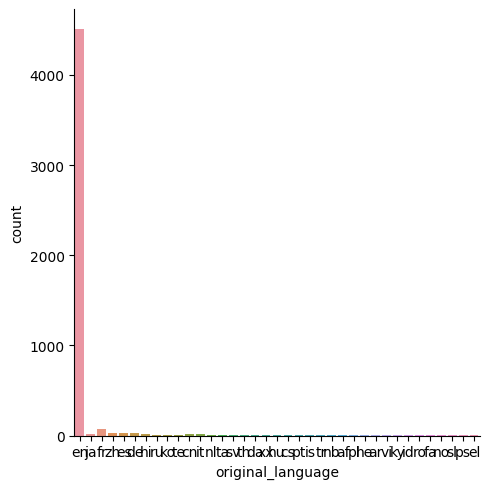

In [30]:
sns.catplot(x = 'original_language', kind='count', data=tmdb)

([<matplotlib.patches.Wedge at 0x2611fc3e090>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'original_language'),
  Text(1.0355355017029462, -0.3710339940124459, 'total')])

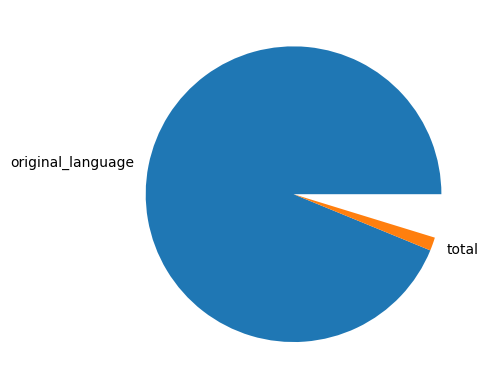

In [31]:
plt.pie(c_l['total'], labels = c_l)

In [32]:
total_por_lingua = tmdb['original_language'].value_counts()
total_por_lingua.loc['en']

4505

In [33]:
total_por_lingua = tmdb['original_language'].value_counts()    
total_geral = total_por_lingua.sum()   #somando o total geral de linguas 
total_de_ingles = total_por_lingua.loc['en']  #fazendo a contagem de quantos 'EN' possui 
total_do_resto = total_geral - total_de_ingles  #verificando quantas linguagens tirando o "EN" existem no dataFrame
print(total_de_ingles, total_do_resto)

4505 298


In [34]:
dados =  {                                            # utilizaremos a função DataFrame() do Pandas, passando dados como parâmetro, para efetivamente criarmos nosso dataframe
    'lingua' : ['ingles', 'outros'], 
    'total' : [total_de_ingles, total_do_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [35]:
pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


<Axes: >

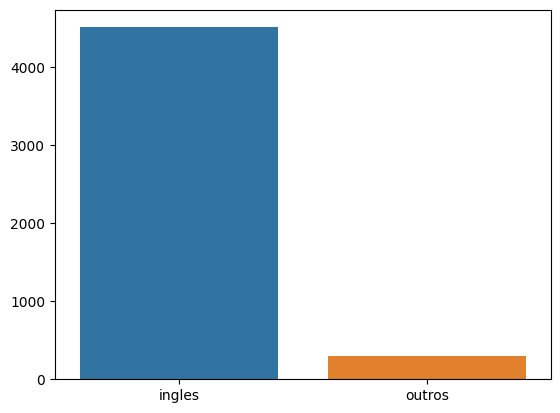

In [36]:
sns.barplot(data = dados, x = 'lingua', y='total')     #passando os dados e defirnimos os eixos x e y 

([<matplotlib.patches.Wedge at 0x2611f136d10>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

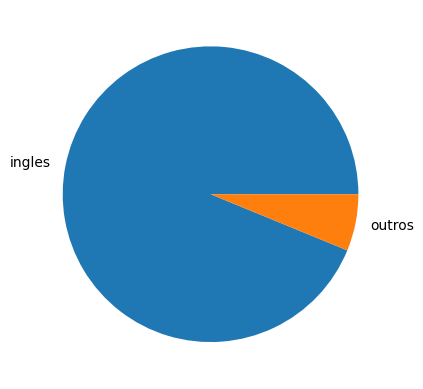

In [37]:
plt.pie(dados['total'], labels = dados['lingua'])  #como parâmetros da nossa função PLT.PIE(), passamos o DADOS['TOTAL'] e LABELS= DADOS['LINGUA'] para criar o gráfico PIZZA

In [38]:
tmdb.query("original_language != 'en'") # usando o QUERY para filtrar somente os filmes com linguagem diferente de 'EN'
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [39]:
filmes_sem_ingles = tmdb.query("original_language != 'en'").original_language.value_counts()  
#criando uma variavel contendo uma QUERY para filtrar somentes os filmes com a linguagem diferente de 'EN' e passando o VALUE_COUNTS() para fazer a contagem das linguagens

<Figure size 500x1000 with 0 Axes>

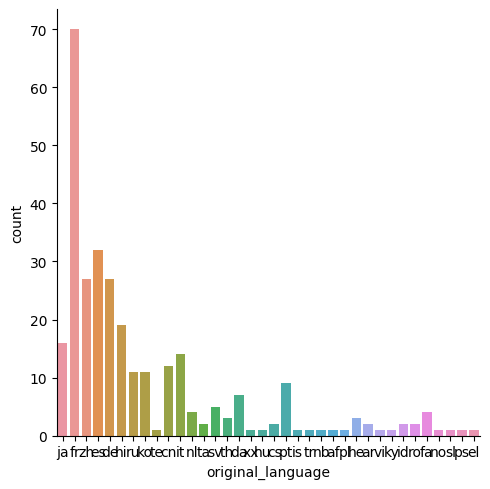

In [40]:
filmes_sl = tmdb.query("original_language != 'en'")
plt.figure(figsize=(5,10))
sns.catplot(x = "original_language", kind='count', data= filmes_sl)

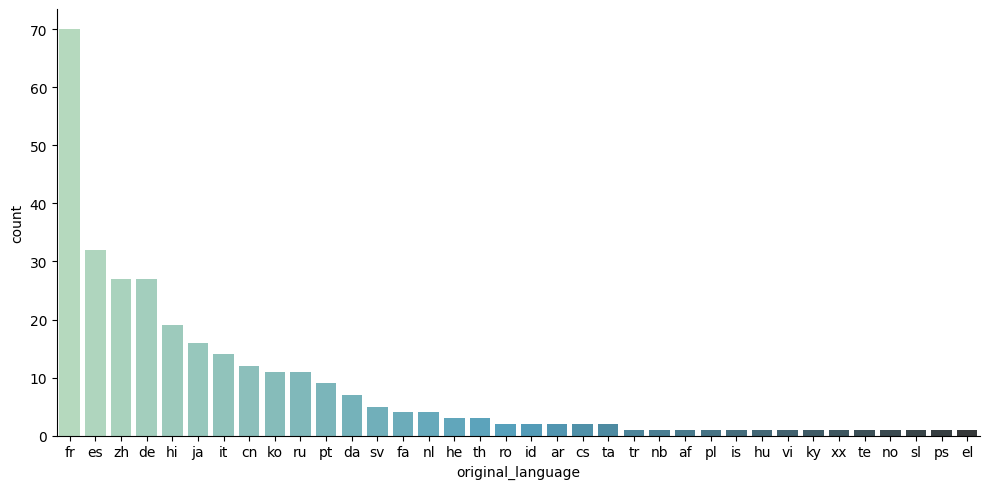

In [41]:
sns.catplot(x = "original_language", 
            kind='count',                       
            data= filmes_sl,                    
            aspect= 2,                  #aparencia do grafico, largura 
            order = filmes_sem_ingles.index,        #ordenar o gráfico do maior para o menor
            palette= "GnBu_d")                        #método usado para alterar a cor do gráfico

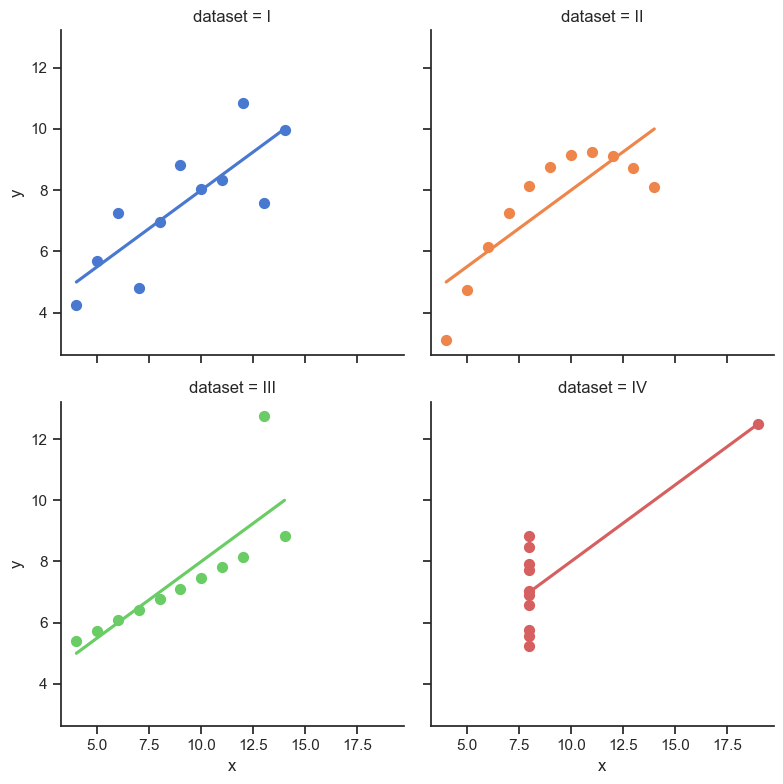

In [42]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [46]:
notas.head()

,usuarioID,filmeID,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [48]:
notas_toystory = notas.query("filmeID==1")
notas_jumanji = notas.query("filmeID==2")
print(len(notas_toystory), len(notas_jumanji))

215 110


In [49]:
#calculando a média dos filmes

print('Nota média do Toy Story  %.2f' % notas_toystory.nota.mean())
print('Nota média do Jumanji  %.2f' % notas_jumanji.nota.mean())

Nota média do Toy Story  3.92
Nota média do Jumanji  3.43


In [50]:
#calculando a mediana 

print('Nota mediana do Toy Story  %.2f' % notas_toystory.nota.median())
print('Nota mediana do Jumanji  %.2f' % notas_jumanji.nota.median())

Nota média do Toy Story  4.00
Nota média do Jumanji  3.50


In [60]:
import numpy as np

filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5.0] * 10), np.array([1.0] * 10))

In [75]:
print(filme1.mean(), filme2.mean())
print(np.std(filme1), np.std(filme2))
print(np.median(filme1), np.mean(filme2))

3.0 3.0
0.5 2.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

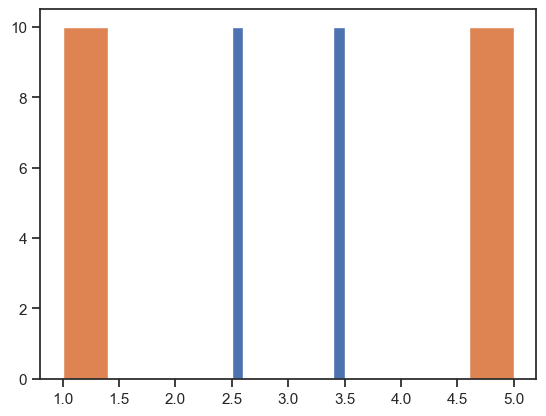

In [77]:
plt.hist(filme1)
plt.hist(filme2)


{'whiskers': [<matplotlib.lines.Line2D at 0x26125c66b10>,
 'caps': [<matplotlib.lines.Line2D at 0x26125c67e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x26125c65990>,
 'medians': [<matplotlib.lines.Line2D at 0x26125c6ce10>,
 'fliers': [<matplotlib.lines.Line2D at 0x26125c6d610>,
 'means': []}

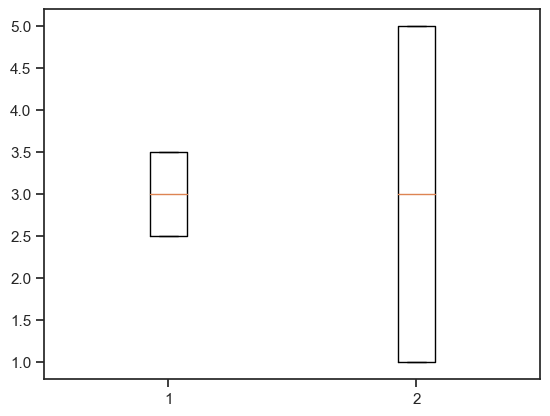

In [69]:
plt.boxplot([filme1, filme2])

{'whiskers': [<matplotlib.lines.Line2D at 0x26126489550>,
 'caps': [<matplotlib.lines.Line2D at 0x26126469710>,
 'boxes': [<matplotlib.lines.Line2D at 0x26126488d50>,
 'medians': [<matplotlib.lines.Line2D at 0x2612648b790>,
 'fliers': [<matplotlib.lines.Line2D at 0x26126489f50>,
 'means': []}

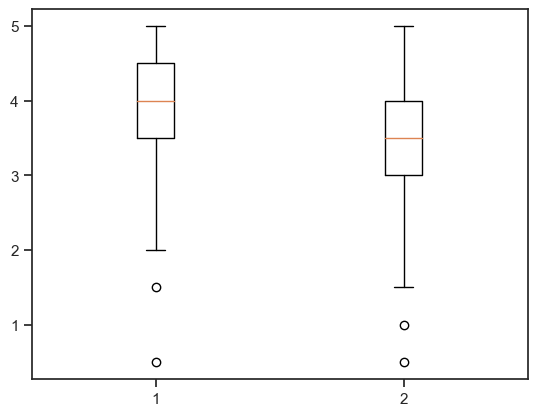

In [72]:
plt.boxplot([notas_toystory.nota, notas_jumanji.nota])

<Axes: xlabel='filmeID', ylabel='nota'>

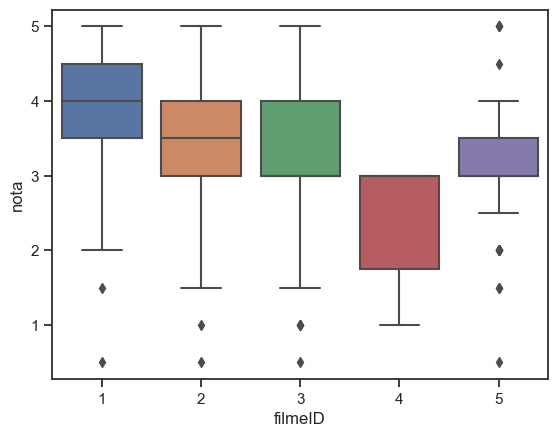

In [73]:
sns.boxplot(x = "filmeID",  y = "nota", data= notas.query("filmeID in [1, 2, 3, 4, 5]"))

In [83]:
print("Desvio padrão do Jumanji %.2f" % notas_jumanji.nota.std(), "\nDesvio padrão do Toy Story %.2f" % notas_toystory.nota.std())

Desvio padrão do Jumanji 0.88 -
Desvio padrão do Toy Story 0.83
